In [6]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt

In [4]:
fire_data = pd.read_csv("./data/merged_data.csv")
fire_data.head()

,index,FIRE_NAME,GIS_ACRES,Shape__Area,Shape__Length,acq_date,latitude_right,longitude_right,frp,type,...,COUNTY_NUM,COUNTY_COD,countyfip,ISLAND,GlobalID,countyfips,ds_pm_pred,log_acres,log_frp,acres_frp_interaction
0,0,LAVAL,41.16521,2.487328e+05,2515.675850,2012-06-03,34.9829,-118.9148,23.1,0,...,15.0,15,29.0,NaN,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5,6029,7.273597,3.741595,3.182212,950.916351
1,1,SAND,1428.45400,8.660542e+06,21616.461724,2012-07-17,35.1097,-118.3168,226.5,0,...,15.0,15,29.0,NaN,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5,6029,7.187228,7.265048,5.427150,323544.831000
2,2,SOUTH,245.71260,1.505821e+06,7866.980151,2012-07-29,35.5599,-118.4634,292.7,0,...,15.0,15,29.0,NaN,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5,6029,9.949866,5.508224,5.682559,71920.078020
3,3,GROOVY,46.53661,3.101320e+05,3119.986471,2011-12-01,38.7503,-120.4645,11.2,0,...,9.0,9,17.0,NaN,8c7709f7-3e81-4245-85d6-3fbc6ebd7261,6017,4.048693,3.861500,2.501436,521.210032
4,4,MINT,601.99160,3.600745e+06,8952.761601,2011-09-17,34.5579,-118.3275,249.0,0,...,19.0,19,37.0,NaN,3b1e1d69-2b1a-464d-ba43-611c4201b219,6037,9.494834,6.401903,5.521461,149895.908400


In [24]:
fire_data.columns

Index(['index', 'FIRE_NAME', 'GIS_ACRES', 'Shape__Area', 'Shape__Length',
       'acq_date', 'latitude_right', 'longitude_right', 'frp', 'type',
       'bright_t31', 'confidence', 'year', 'month', 'distance', 'day',
       'geometry', 'index_right', 'COUNTY_NAM', 'COUNTY_ABB', 'COUNTY_NUM',
       'COUNTY_COD', 'countyfip', 'ISLAND', 'GlobalID', 'countyfips',
       'ds_pm_pred', 'log_acres', 'log_frp', 'acres_frp_interaction'],
      dtype='object')

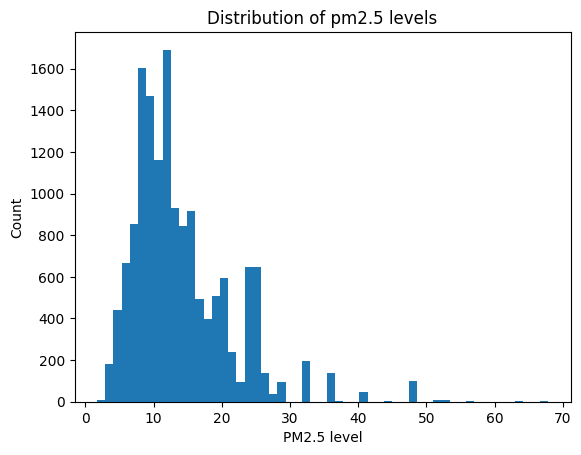

In [9]:
plt.hist(fire_data['ds_pm_pred'], bins = 55)
plt.title("Distribution of pm2.5 levels")
plt.xlabel("PM2.5 level")
plt.ylabel("Count")
plt.show()

In [25]:
fire_data['log_acres'] = np.log(fire_data['GIS_ACRES'] + 1)
fire_data['log_frp'] = np.log(fire_data['frp'] + 1)
fire_data['acres_frp_interaction'] = fire_data['GIS_ACRES'] * fire_data['frp']
fire_data['month'] = pd.to_datetime(fire_data['acq_date']).dt.month
fire_data['day_of_week'] = pd.to_datetime(fire_data['acq_date']).dt.dayofweek

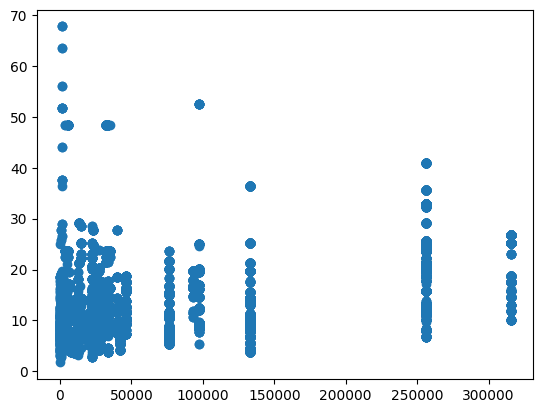

In [14]:
plt.scatter(fire_data['GIS_ACRES'], fire_data['ds_pm_pred'])

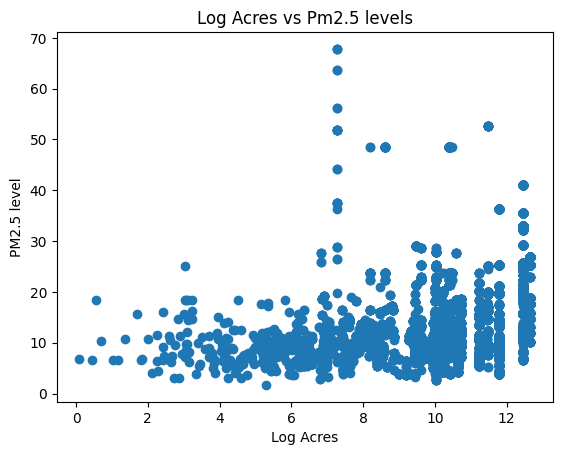

In [36]:
plt.scatter(fire_data['log_acres'], fire_data['ds_pm_pred'])
plt.title("Log Acres vs Pm2.5 levels")
plt.xlabel("Log Acres")
plt.ylabel("PM2.5 level")
plt.show()

## GLMs

In [17]:
import statsmodels.api as sm
X = fire_data[['frp', 'bright_t31', 'Shape__Area', 'Shape__Length']]

X = sm.add_constant(X)
X.reset_index(drop=True, inplace=True)  

y = fire_data['ds_pm_pred']
y.reset_index(drop=True, inplace=True)  

glm_model = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.Log()))
glm_results = glm_model.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             ds_pm_pred   No. Observations:                15167
Model:                            GLM   Df Residuals:                    15162
Model Family:                   Gamma   Df Model:                            4
Link Function:                    Log   Scale:                         0.24713
Method:                          IRLS   Log-Likelihood:                -47965.
Date:                Sun, 05 May 2024   Deviance:                       2959.3
Time:                        17:10:52   Pearson chi2:                 3.75e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1852
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.6021      0.117     30.752

In [18]:
X = fire_data[['acres_frp_interaction', 'log_frp', 'log_acres','day','year', 'month','GIS_ACRES', 'frp', 'bright_t31', 'Shape__Area', 'Shape__Length']]

X = sm.add_constant(X)
X.reset_index(drop=True, inplace=True)  

y = fire_data['ds_pm_pred']
y.reset_index(drop=True, inplace=True)  

glm_model = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.Log()))
glm_results = glm_model.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             ds_pm_pred   No. Observations:                15167
Model:                            GLM   Df Residuals:                    15156
Model Family:                   Gamma   Df Model:                           10
Link Function:                    Log   Scale:                         0.20843
Method:                          IRLS   Log-Likelihood:                -47280.
Date:                Sun, 05 May 2024   Deviance:                       2769.0
Time:                        17:12:10   Pearson chi2:                 3.16e+03
No. Iterations:                    27   Pseudo R-squ. (CS):             0.2614
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -241.88

In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

X = fire_data[['log_frp', 'log_acres', 'day_of_week', 'year', 'month', 'GIS_ACRES', 'bright_t31', 'Shape__Length']]
X = sm.add_constant(X)
X.reset_index(drop=True, inplace=True)

y = fire_data['ds_pm_pred']
y.reset_index(drop=True, inplace=True)

# Create KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    glm_model = sm.GLM(y_train, X_train, family=sm.families.Gamma(link=sm.families.links.Log()))
    glm_results = glm_model.fit()
    
    y_pred = glm_results.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    cv_scores.append(mse)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [40.78659461825231, 41.07096358117683, 41.437238339382866, 38.463752617189904, 42.688698255647466]
Mean cross-validation score: 40.88944948232987


In [35]:
X = fire_data[['log_acres', 'day_of_week', 'year', 'month','GIS_ACRES', 'bright_t31', 'Shape__Length', 'Shape__Area']]

X = sm.add_constant(X)
X.reset_index(drop=True, inplace=True)  

y = fire_data['ds_pm_pred']
y.reset_index(drop=True, inplace=True)  

glm_model = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.Log()))
glm_results = glm_model.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             ds_pm_pred   No. Observations:                15167
Model:                            GLM   Df Residuals:                    15159
Model Family:                   Gamma   Df Model:                            7
Link Function:                    Log   Scale:                         0.20209
Method:                          IRLS   Log-Likelihood:                -47108.
Date:                Sun, 05 May 2024   Deviance:                       2713.1
Time:                        17:55:11   Pearson chi2:                 3.06e+03
No. Iterations:                    41   Pseudo R-squ. (CS):             0.2816
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -237.0501     10.526    -22.520

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = fire_data[['frp', 'log_acres', 'day_of_week', 'year', 'month','GIS_ACRES', 'bright_t31', 'Shape__Area', 'Shape__Length']]
y = fire_data['ds_pm_pred']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest - R-squared: {r2_rf:.2f}")

Random Forest - Mean Squared Error: 14.78
Random Forest - R-squared: 0.74


## Neural Net

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
nn.fit(X_train_scaled, y_train)

y_pred_nn = nn.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network - Mean Squared Error: {mse_nn:.2f}")
print(f"Neural Network - R-squared: {r2_nn:.2f}")

Neural Network - Mean Squared Error: 25.46
Neural Network - R-squared: 0.55


/Users/otaira/.pyenv/versions/3.12.2/envs/emberalert/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
